In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [5]:
df.created_at = pd.to_datetime(df.created_at)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


# Data Exploration

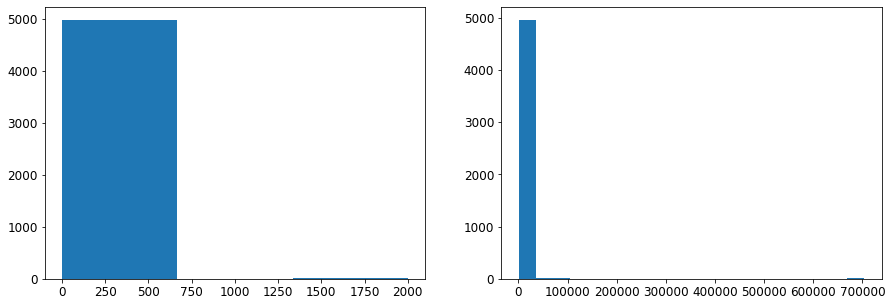

In [8]:
%matplotlib inline

plt.rc('font', size=12)
fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs[0].hist(df.total_items,bins=3)
axs[1].hist(df.order_amount,bins=20)
plt.show()

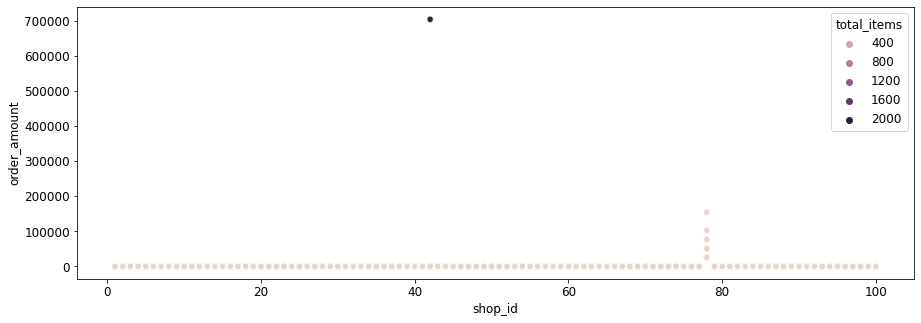

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df, x="shop_id", y="order_amount",hue="total_items")
plt.show()

In [10]:
df['item_sell_price'] = df["order_amount"] / df["total_items"]

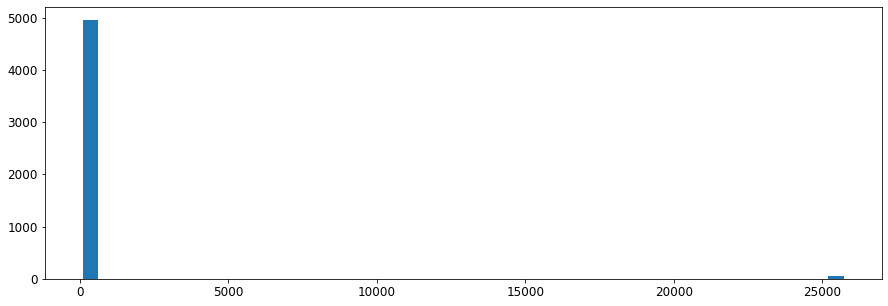

In [11]:
fig, axs = plt.subplots(figsize=(15, 5))
axs.hist(df.item_sell_price,bins=50)
plt.show()

In [12]:
df[(df.item_sell_price > 200)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_sell_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
107,108,12,732,201,1,credit_card,2017-03-21 20:26:18,201.0
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
...,...,...,...,...,...,...,...,...
4900,4901,12,774,603,3,debit,2017-03-10 17:48:32,201.0
4911,4912,12,805,201,1,credit_card,2017-03-07 20:31:10,201.0
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46,25725.0
4948,4949,12,845,402,2,cash,2017-03-01 10:59:55,201.0


In [13]:
df[(df.item_sell_price < 200)].describe()

,order_id,shop_id,user_id,order_amount,total_items,item_sell_price
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,2498.974433,50.315052,849.918144,299.581649,1.998351,149.847216
std,1443.037354,29.041265,86.889056,155.738712,0.983886,23.383908
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1249.250000,25.000000,776.000000,162.000000,1.000000,132.000000
50%,2499.500000,51.000000,850.000000,284.000000,2.000000,153.000000
75%,3748.750000,75.000000,925.000000,386.000000,3.000000,165.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,196.000000


In [14]:
df[(df.item_sell_price < 200)].median()

<ipython-input-14-a1721206bb6c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[(df.item_sell_price < 200)].median()


order_id           2499.5
shop_id              51.0
user_id             850.0
order_amount        284.0
total_items           2.0
item_sell_price     153.0
dtype: float64